###Μηχανική Μάθηση
####2η ατομική εργασία
ΕΔΕΜΜ- ΣΗΜΜΥ- ΕΜΠ -Ακ. Έτος 2023-24



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

 `⚠️  Το σύνολο δεδομένων που σας δόθηκε δεν πρέπει να εμπλουτισθεί με οποιοδήποτε τρόπο. Η εργασία στην οποία θα χρησιμοποιηθεί εμπλουτισμένο σύνολο δεδομένων, δεν θα διορθωθεί.`

Ονοματεπώνυμο φοιτητή: ΑΝΤΩΝΙΟΣ ΠΡΟΜΠΟΝΑΣ

Α.Μ.: 03400232


# Μέρος Α': Μη επιβλεπόμενη μάθηση

### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA)
Χρησιμοποιήστε code cells  με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων και text cells για επεξήγηση των αποτελεσμάτων.

### 3. Προεπεξεργασία των δεδομένων

Εφαρμόστε κανονικοποίηση και μείωση των διαστάσεων των δεδομένων

     Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
0       14.23      1.71      2.43      15.6     127.0      2.80      3.06   
1       13.20      1.78      2.14      11.2     100.0      2.65      2.76   
2       13.16      2.36      2.67      18.6     101.0      2.80      3.24   
3       14.37      1.95      2.50      16.8     113.0      3.85      3.49   
4       13.24      2.59      2.87      21.0     118.0      2.80      2.69   
..        ...       ...       ...       ...       ...       ...       ...   
173     13.71      5.65      2.45      20.5      95.0      1.68      0.61   
174     13.40      3.91      2.48      23.0     102.0      1.80      0.75   
175     13.27      4.28      2.26      20.0     120.0      1.59      0.69   
176     13.17      2.59      2.37      20.0     120.0      1.65      0.68   
177     14.13      4.10      2.74      24.5      96.0      2.05      0.76   

     Feature8  Feature9  Feature10  Feature11  Feature12  Feature13  
0    

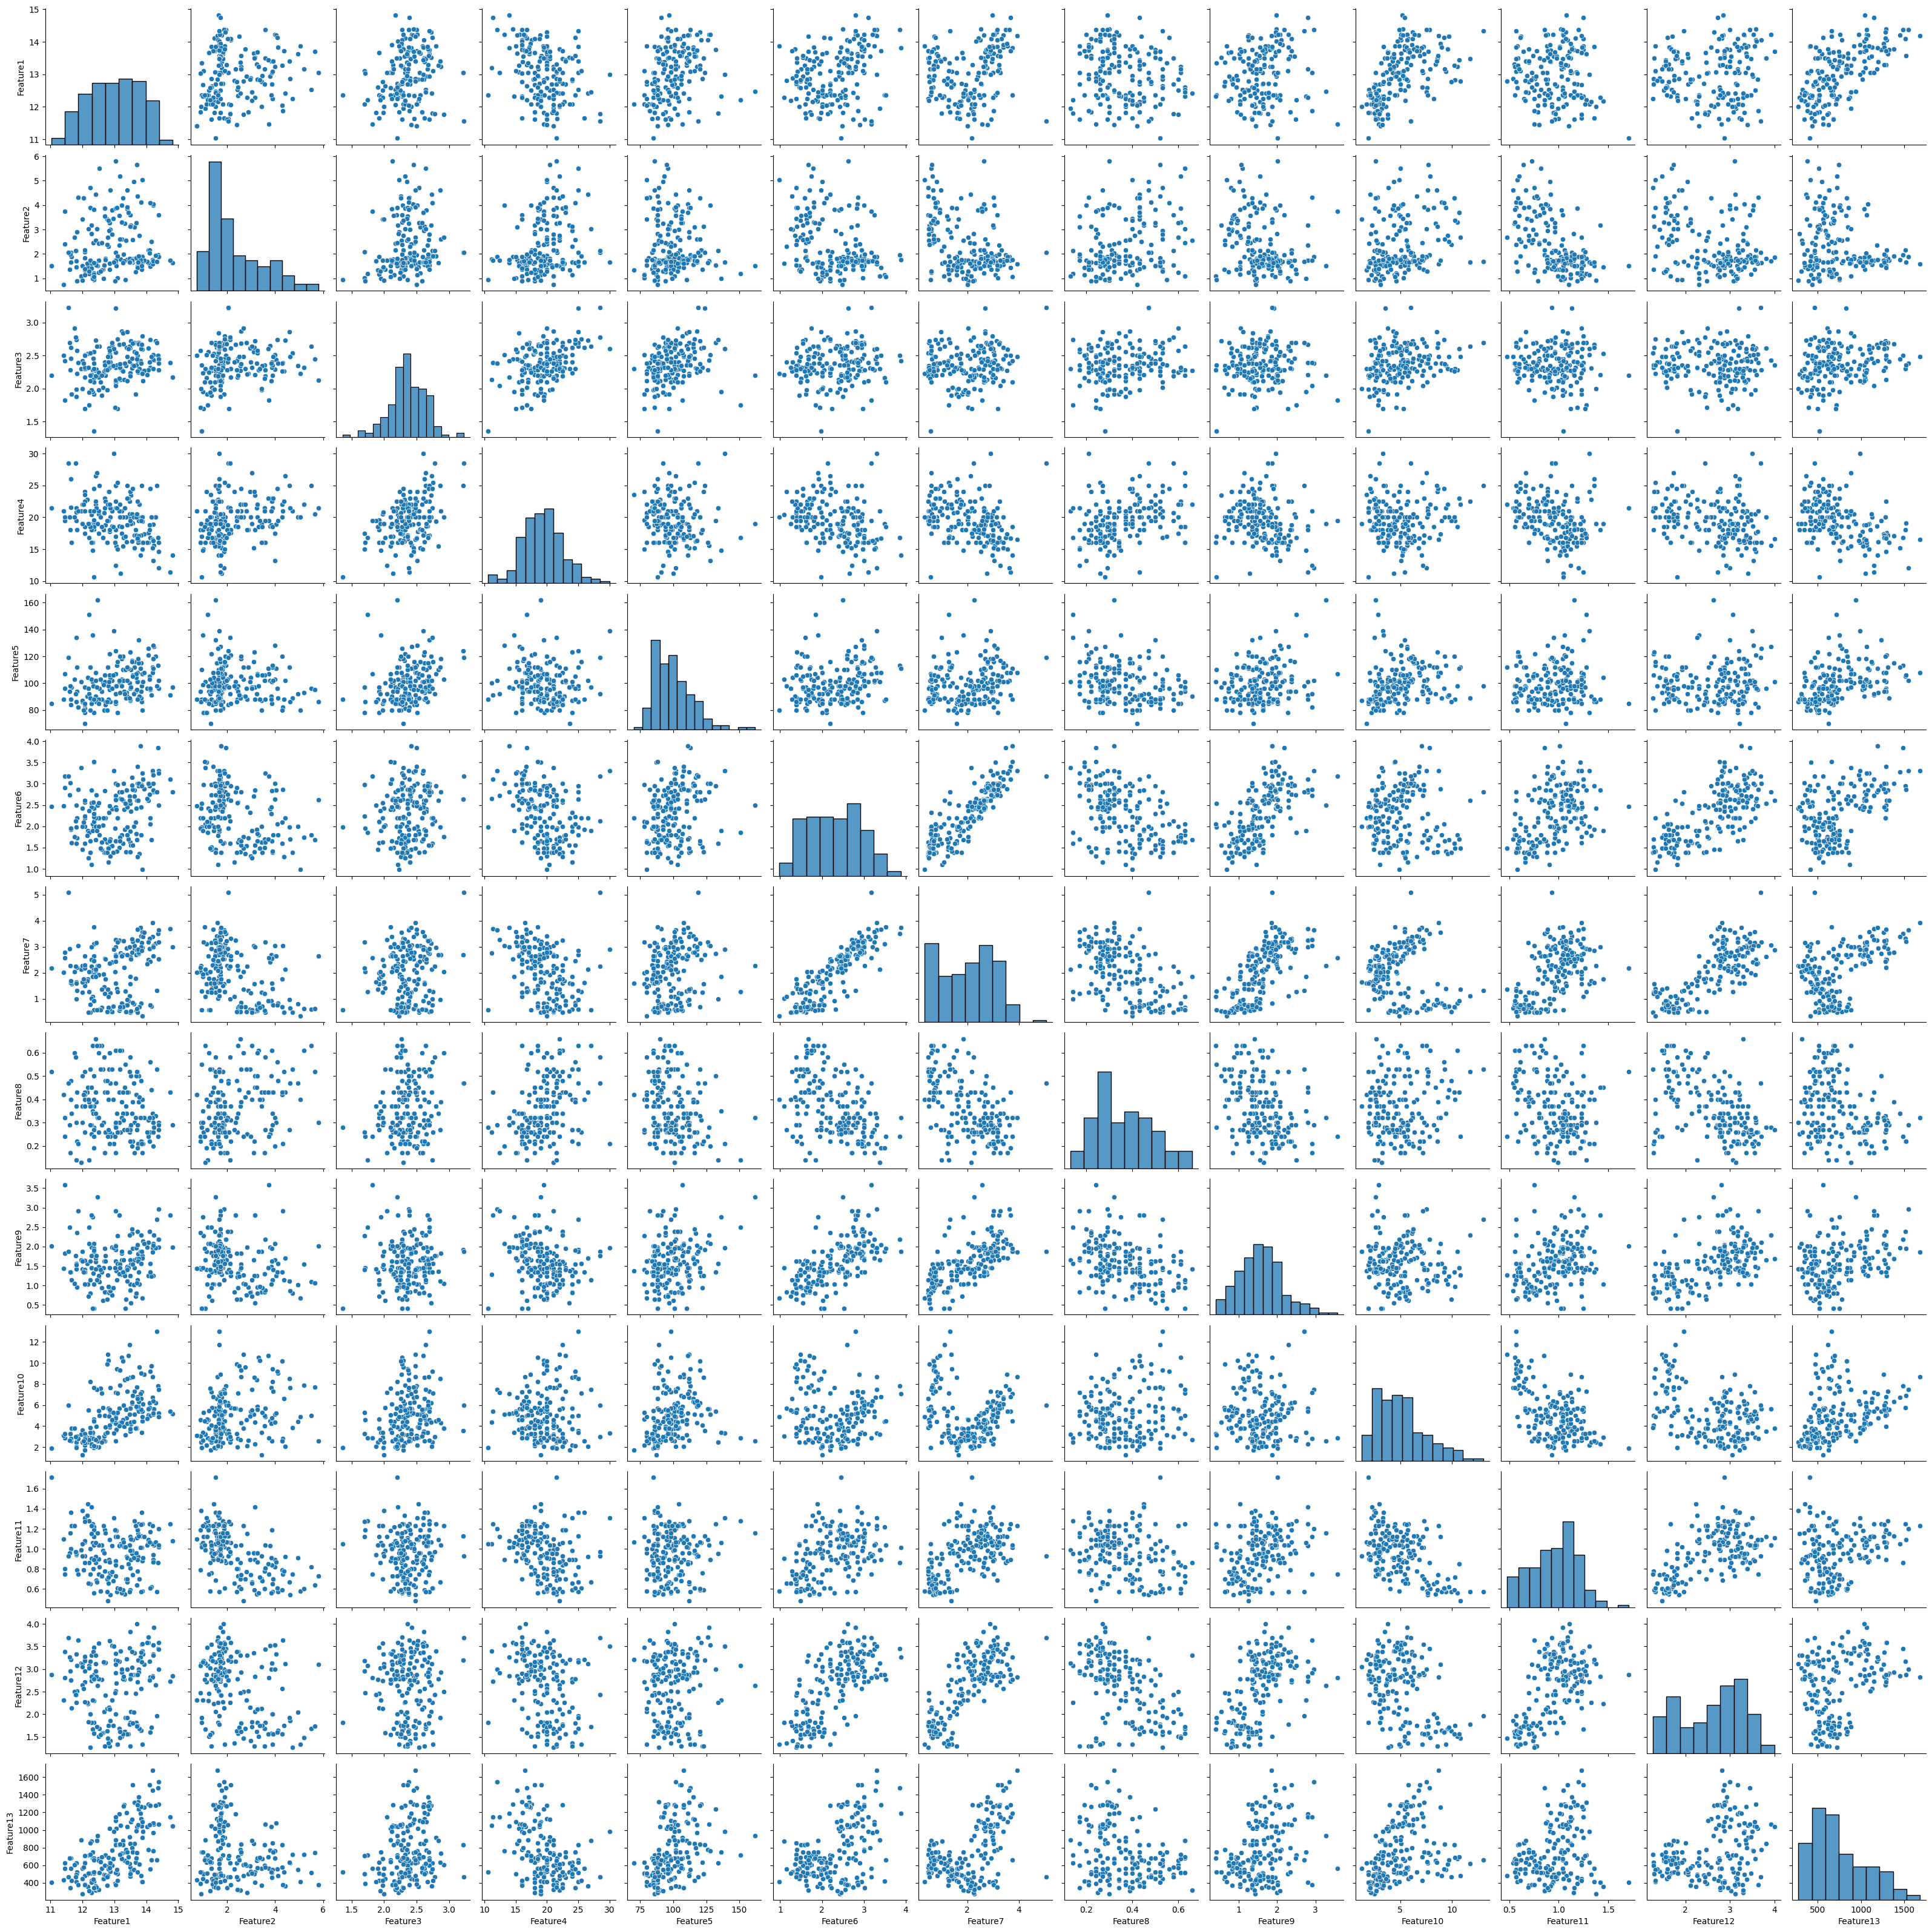



Χάρτης θερμότητας (heatmap) για να εξερευνήσω τις συσχετίσεις μεταξύ των χαρακτηριστικών:




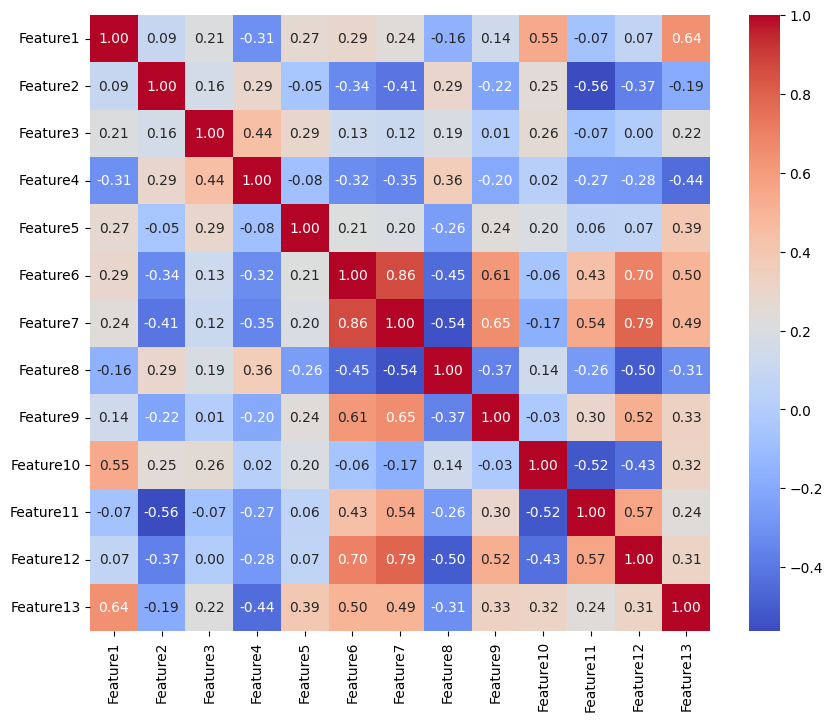



Histogram:




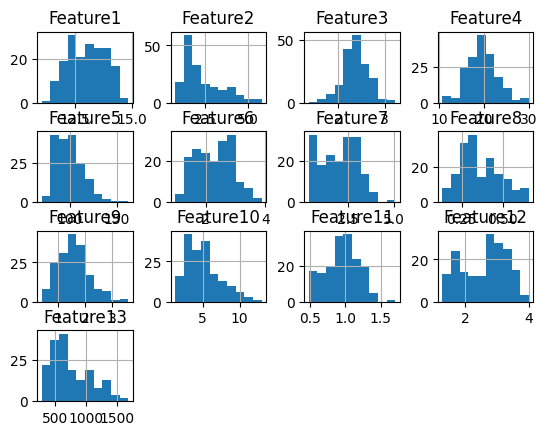





explained_variance_ratio:[0.36198848 0.1920749 ]


cumulative_variance_ratio[0.36198848 0.55406338]

DataFrame μετά την κανονικοποίηση
     Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
0    1.518613 -0.562250  0.232053 -1.169593  1.913905  0.808997  1.034819   
1    0.246290 -0.499413 -0.827996 -2.490847  0.018145  0.568648  0.733629   
2    0.196879  0.021231  1.109334 -0.268738  0.088358  0.808997  1.215533   
3    1.691550 -0.346811  0.487926 -0.809251  0.930918  2.491446  1.466525   
4    0.295700  0.227694  1.840403  0.451946  1.281985  0.808997  0.663351   
..        ...       ...       ...       ...       ...       ...       ...   
173  0.876275  2.974543  0.305159  0.301803 -0.332922 -0.985614 -1.424900   
174  0.493343  1.412609  0.414820  1.052516  0.158572 -0.793334 -1.284344   
175  0.332758  1.744744 -0.389355  0.151661  1.422412 -1.129824 -1.344582   
176  0.209232  0.227694  0.012732  0.151661  1.422412 -1.033684 -1.354622   
177  1.395086 

In [ ]:
# Εισαγωγή απαραίτητων βιβλιοθηκών
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Φόρτωση του Wine dataset
wine = load_wine()
X = wine.data
y = wine.target



# Δημιουργία DataFrame από τα δεδομένα
columns = ["Feature1", "Feature2", "Feature3", "Feature4", "Feature5", "Feature6", "Feature7", "Feature8", "Feature9", "Feature10", "Feature11", "Feature12", "Feature13"]
dataframe = pd.DataFrame(X, columns=columns)
print(dataframe)
#part2

#train data analysis
print("Train data analysis:\n")
#2a
samples_shape, features_shape =dataframe.shape


print(f"Το πλήθος δειγμάτων συνόλου δεδομένων train είναι: {samples_shape}")
print(f"Το πλήθος χαρακτηριστικών του συνόλου δεδομένων train είναι : {features_shape}")
print("\n")

#2b
feature_type=dataframe.dtypes
print(f"To είδος των χαρακτηριστικών του συνόλου δεδομένων είναι: \n{feature_type}")
print("\n")



#2c
feature_labels=dataframe.columns
print(f"Οι ετικέτες των features είναι: \n{feature_labels}\n")
feature_labels_list=feature_labels.tolist()
print(f"Οι ετικέτες των features : {feature_labels_list}\n")

#2d
for feature in feature_labels:
  categories=dataframe[feature].nunique()
print(f"Το πλήθος των μοναδικών κατηγοριών για κάθε χαρακτηριστικό  είναι: {categories}")
print("\n")
#2e
for feature_label in feature_labels:
  samples=dataframe[feature_label].value_counts()
print(f"Κάθε κατηγοορία αποτελείται από τα εξής δείγματα: \n{samples}\n")


total_null_values = dataframe.isnull().sum().sum()
print(f"Συνολικός αριθμός null τιμών: {total_null_values}")
print("\n")


description = dataframe.describe()
print(description)
print("\n")
#2f
correlation=dataframe.corr()
print(f"\nΗ συσχέτιση μεταξύ των δεδομένων δίνεται από τον παρακάτω πίνακα συσχέτισης: \n\n{correlation}\n")

#2g
# Οπτικοποιεί τα δεδομένα με ένα pairplot για εξερεύνηση συσχετίσεων
print("\n\nΟπτικοποίηση δεδομένων για εξερεύνηση συσχετίσεων:\n\n")
sns.pairplot(dataframe)
plt.show()

# Δημιουργεί έναν χάρτη θερμότητας (heatmap) για να ελέγξψω τις συσχετίσεις μεταξύ των χαρακτηριστικών
print("\n\nΧάρτης θερμότητας (heatmap) για να εξερευνήσω τις συσχετίσεις μεταξύ των χαρακτηριστικών:\n\n")
plt.figure(figsize=(10, 8))
sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

#Δημιουργία Ιστογράμματος
print("\n\nHistogram:\n\n")
dataframe.hist()
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()


print("\n\n")

#part3
features_to_normalize = ["Feature1", "Feature2", "Feature3", "Feature4", "Feature5", "Feature6", "Feature7", "Feature8", "Feature9", "Feature10", "Feature11", "Feature12", "Feature13"]

scaler = StandardScaler()#(with_mean=False)

# κανονικοποίηση στα επιλεγμένα χαρακτηριστικά
dataframe[features_to_normalize] = scaler.fit_transform(dataframe[features_to_normalize])
scaler = StandardScaler()
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dataframe)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()
scaled_data=scaler.fit_transform(principal_components)


print(f"\nexplained_variance_ratio:{explained_variance_ratio}\n" )
print(f"\ncumulative_variance_ratio{cumulative_variance_ratio}\n")

print("DataFrame μετά την κανονικοποίηση")
print(dataframe)

#Στην αρχή δείχνω το τύπο των μεταβλητών και το πλήθος τους.
#Το dataframe δεν περιέχει null values
#Η εντολή describe() επιστρέφει ένα DataFrame που περιλαμβάνει στατιστικά περιλήψεων για κάθε αριθμητική στήλη.
#Τα πεδία που παρέχονται περιλαμβάνουν τη μέση τιμή (mean), το εύρος (min έως max), τη διάκριση (25%, 50%, 75%),
#την τυπική απόκλιση (std) και άλλες.
#Χρησιμοποιούμε το correlation matrix για να δουμε τη συσχετιση μεταξύ των μεταβλητών. Βλέπουμε ότι μόνο 2 μεταβλητές
#έχουν μεταξύ τους ισχυρή συσχέτιση
#Για να ενισχύσω το συγκεκριμένο επιχείρημα, χρησιμοποιώ διαγράμματα που δείχνουν το πόσο ομοιόμορφα
#κατανεμημένα ή όχι, είναι τα δεδομένα στην κάθε περίπτωση.
#Εφάρμοσα pca προκειμένου να μειώσω τις διαστάσεις σε 2.Έπειτα κανονικοποιω τα δεδομένα.



### 4. Δημιουργία μοντέλου K-Means βασιζόμενο στην inertia

4α. Εκτελέστε K-Means clustering για διάφορους αριθμούς clusters (1 έως 10) και καταγράψτε την Inertia για κάθε περίπτωση.

In [ ]:
inertia=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
count=0
for i in inertia:
  count+=1
  print(f"Cluster no: {count} --> Inertia:{i}")


Cluster no: 1 --> Inertia:356.0
Cluster no: 2 --> Inertia:207.34506009582043
Cluster no: 3 --> Inertia:76.08799709977357
Cluster no: 4 --> Inertia:62.20045780980864
Cluster no: 5 --> Inertia:47.45766062955582
Cluster no: 6 --> Inertia:36.66308708444207
Cluster no: 7 --> Inertia:34.3900700980586
Cluster no: 8 --> Inertia:26.543179716712274
Cluster no: 9 --> Inertia:24.347727500866966
Cluster no: 10 --> Inertia:21.7139520717001


4β. Απεικονίστε  την Inertia σε σχέση με τον αριθμό των clusters και εντοπίστε το elbow point.

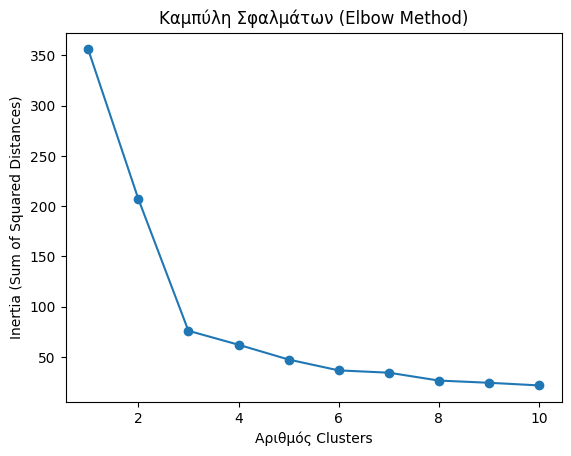

In [ ]:
clusters = range(1, 11)
plt.plot(clusters, inertia, marker='o')
plt.title('Καμπύλη Σφαλμάτων (Elbow Method)')
plt.xlabel('Αριθμός Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()
#4γ
#Κατά την εκτέλεση του K-Means με διάφορους αριθυμούς clusters , η Inertia μείωνεται καθώς ο αριθμός
#των clusters αυξάνεται.Σε κάποιο σημείο, η μείωση αυτή επιβραδύνεται και η γραφική παράσταση της Inertia σε σχέση
#με τον αριθμό των clusters μοιάζει με έναν "αγκώνα".
#Στο παρακάτω διάγραμμα ο λεγόμενος "αγκώνας" δημιουργείται για cluster με αριθμό 3 και inertia να είναι περίπου 76.
#Σε αυτό το σημείο αρχίζει να επιβραδύνεται
#η μείωση της τιμής της Inerta , οπότε θεωρώ ότι αυτό είναι ένα καλό σημείο επιλογής για το βέλτιστο
#αριθμό cluster. Άρα, η επιλογή μου είναι cluster=3.

 4γ. Ποιος αριθμός clusters φαίνεται να είναι ο κατάλληλος; Σχολιάστε τα αποτελέσματα.

4δ. Δημιουργία μοντέλου K-Means με αριθμός clusters σύμφωνο με την απάντησή σας στο ερώτημα 4γ.


In [ ]:
# Δημιουργία ενός αντικειμένου KMeans
kmeans = KMeans(n_clusters=3,n_init='auto' ,random_state=42)

# Εκτέλεση του αλγορίθμου K-Means στα δεδομένα
kmeans.fit(scaled_data)


# Υπολογισμός των ετικετών των clusters για κάθε παρατηρούμενο σημείο
label = kmeans.labels_
print("Ετικέτες Cluster:\n", label)

labels = kmeans.fit_predict(scaled_data)
print("labels:\n", labels)
print("\n")

# Υπολογισμός των κέντρων των clusters
centers = kmeans.cluster_centers_
print("\nΚέντρα Cluster:\n", centers)

Ετικέτες Cluster:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
labels:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]



Κέντρα Cluster:
 [[-0.03504284  1.09864629]
 [-1.26489346 -0.76838677]
 [ 1.05512612 -0.60749174]]


4ε. Απεικονίστε τα αποτελέσματα του K-Means

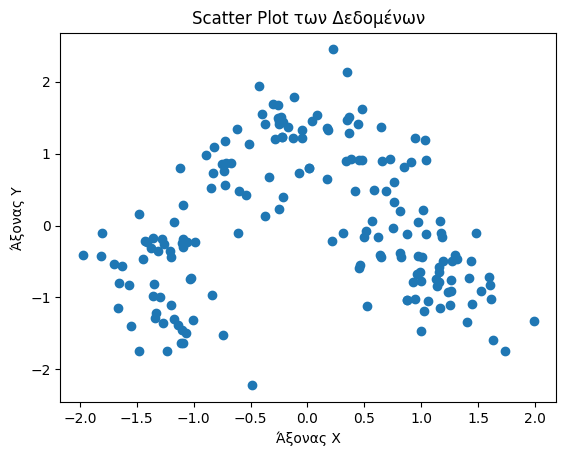

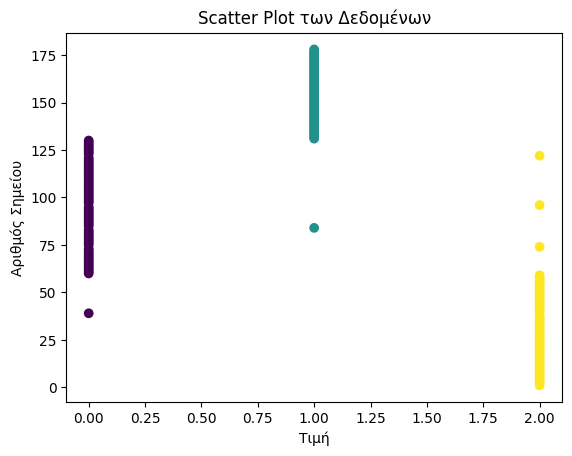

In [ ]:
# Απεικονίστε τα αποτελέσματα

import numpy as np
import matplotlib.pyplot as plt

d = np.array(scaled_data)

# Απεικόνιση των δεδομένων σε ένα scatter plot
plt.scatter(d[:, 0], d[:, 1])
plt.title('Scatter Plot των Δεδομένων')
plt.xlabel('Άξονας X')
plt.ylabel('Άξονας Y')
plt.show()




d1 = np.array(labels)
n = len(d1)
indices = list(range(1, n + 1))

# Απεικόνιση των δεδομένων σε ένα scatter plot
plt.scatter( d1,indices, c=d1, cmap='viridis')
plt.title('Scatter Plot των Δεδομένων')
plt.ylabel('Αριθμός Σημείου')
plt.xlabel('Τιμή')
plt.show()

#print(principal_components)

### 5. Hierarchical Agglomerative Clustering (HAC)

5α. Δημιουργία μοντέλου HAC με 3 clusters


In [ ]:
from sklearn.cluster import AgglomerativeClustering
hac = AgglomerativeClustering(n_clusters=3)
d = np.array(scaled_data)
hac_labels = hac.fit_predict(d)
print(hac_labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


5β. Απεικονίστε τα αποτελέσματα του Hierarchical Agglomerative Clustering

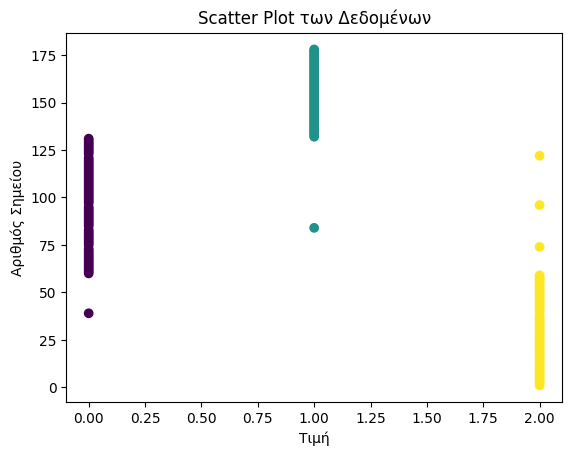

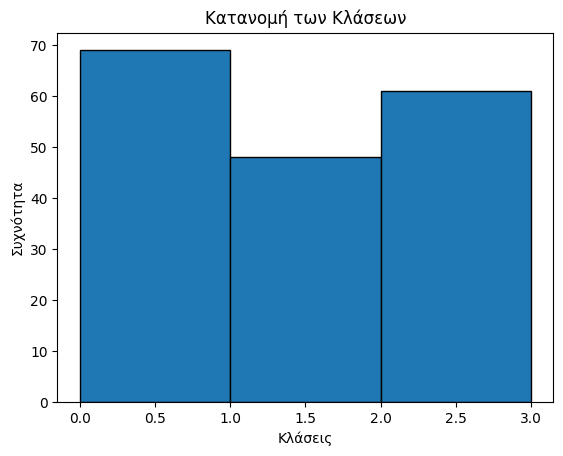

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



#scatterplot
d = np.array(hac_labels)
n = len(d)
indices = list(range(1, n + 1))

# Απεικόνιση των δεδομένων σε ένα scatter plot
plt.scatter( d,indices, c=d, cmap='viridis')
plt.title('Scatter Plot των Δεδομένων')
plt.ylabel('Αριθμός Σημείου')
plt.xlabel('Τιμή')
plt.show()



d = np.array(hac_labels)
# histogram
plt.hist(d, bins=[0, 1, 2, 3], edgecolor='black')
plt.title('Κατανομή των Κλάσεων')
plt.xlabel('Κλάσεις')
plt.ylabel('Συχνότητα')
plt.show()

#5γ
#Βλέπουμε και από τα αποτελέσματα των labels και από τα διαγράμματα,
#ότι ο αλγόριθμος kmeans δίνει το ίδιο αποτέλεσμα με τον αλγόριθμο HAC.
#Πολύ σημαντικό ρόλο στο να συμβεί αυτό, παίζει ο αριθμός των clusters
#όπου είναι ίδιος και στις 2 περιπτώσεις. cluster=3. Στον HAC χρησιμοποιούμε
#cluster=3 , έπειτα από υπόδειξη της εκφώνησης, ενώ στον KMeans, επειδή σε αυτό το
#σημείο δημιουργείται το elbow point.

5γ. Συγκρίνετε τα αποτελέσματα των δύο αλγορίθμων και σχολιάστε την επιλογή του αριθμού των clusters.


5δ. Εξετάστε την απόδοση των αλγορίθμων σε σχέση με τις πραγματικές κλάσεις του dataset. Χρησιμοποιήστε τις ετικέτες y για να αξιολογήσετε την πρόβλεψη των clusters.

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.metrics import silhouette_score


# Υπολογισμός του Adjusted Rand Index
ari = adjusted_rand_score(y, hac_labels)
print(f"Adjusted Rand Index: {ari}")

# Υπολογισμός του Normalized Mutual Information
nmi = normalized_mutual_info_score(y, hac_labels)
print(f"Normalized Mutual Information: {nmi}")

fmi_score = fowlkes_mallows_score(y, hac_labels)
print("Fowlkes-Mallows Index:", fmi_score)

silhouette_avg = silhouette_score(scaled_data, hac_labels)
print("Silhouette Score:", silhouette_avg)



Adjusted Rand Index: 0.8960646870999063
Normalized Mutual Information: 0.8582946574296247
Fowlkes-Mallows Index: 0.9311269779981313
Silhouette Score: 0.5759778123728618


# Μέρος Β': Ensemble Methods

### 1. Εισαγωγή απαραιτήτων βιβλιοθηκών και συνόλου δεδομένων

In [ ]:
!pip install shap
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb
from xgboost import plot_importance
import shap

# Load the Breast Cancer dataset
data = load_breast_cancer()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.6 MB/s eta 0:00:00


### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA)
Χρησιμοποιήστε code cells  με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων και text cells για επεξήγηση των αποτελεσμάτων.

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
(569, 30)
     Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
0       17.99     10.38    122.80    1001.0   0.11840   0.27760   0.30010   
1       20.57     17.77    132.90    1326.0   0.08474   0.07864   0.08690   
2       19.69     21.25    130.00    1203.0   0.10960   0.15990   0.19740   
3       11.42     20.38     77.58     386.1   0.14250   0.28390   0.24140   
4       20.29     14.34    135.10    1297.0   0.10030   0.13280   0.19800   
..        ...       ...       ...       ...       ...       ...       ...   
564     21.56     22.39    142.00    1479.0

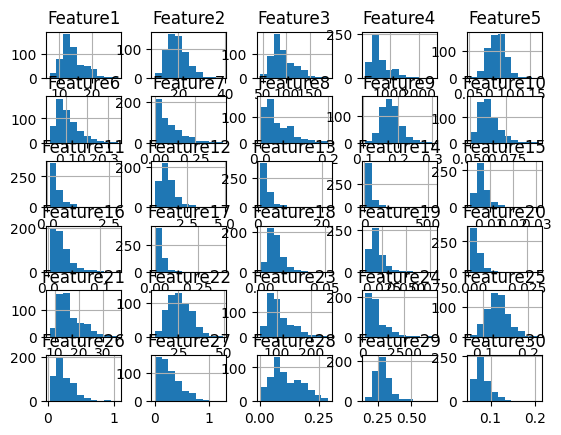

In [ ]:
X = data.data
y = data.target
print(X)
#print(y)

#print(data)
print(X.shape)

# Define column names for the DataFrame
columns = [f'Feature{i+1}' for i in range(30)]

# Create DataFrame
dataframe = pd.DataFrame(X, columns=columns)

# Display the DataFrame
print(dataframe)

#train data analysis
print("Train data analysis:\n")
#2a
samples_shape, features_shape =dataframe.shape


print(f"Το πλήθος δειγμάτων συνόλου δεδομένων train είναι: {samples_shape}")
print(f"Το πλήθος χαρακτηριστικών του συνόλου δεδομένων train είναι : {features_shape}")
print("\n")

#2b
feature_type=dataframe.dtypes
print(f"To είδος των χαρακτηριστικών του συνόλου δεδομένων είναι: \n{feature_type}")
print("\n")



#2c
feature_labels=dataframe.columns
print(f"Οι ετικέτες των features είναι: \n{feature_labels}\n")
feature_labels_list=feature_labels.tolist()
print(f"Οι ετικέτες των features ως λίστα: {feature_labels_list}\n")

#2d
for feature in feature_labels:
  categories=dataframe[feature].nunique()
print(f"Το πλήθος των μοναδικών κατηγοριών για κάθε χαρακτηριστικό  είναι: {categories}")
print("\n")
#2e
for feature_label in feature_labels:
  samples=dataframe[feature_label].value_counts()
print(f"Κάθε κατηγοορία αποτελείται από τα εξής δείγματα: \n{samples}\n")


total_null_values = dataframe.isnull().sum().sum()
print(f"Συνολικός αριθμός null τιμών: {total_null_values}")
print("\n")

print("Description table:")
description = dataframe.describe()
print(description)
print("\n")

#2f
correlation=dataframe.corr()
print(f"\nΗ συσχέτιση μεταξύ των δεδομένων δίνεται από τον παρακάτω πίνακα συσχέτισης: \n\n{correlation}\n")


#Δημιουργία Ιστογράμματος
print("\n\nHistogram:\n\n")
dataframe.hist()
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()


print("\n\n")



#Στην αρχή δείχνω το τύπο των μεταβλητών και το πλήθος τους.
#Το dataframe δεν περιέχει null values
#Η εντολή describe() επιστρέφει ένα DataFrame που περιλαμβάνει στατιστικά περιλήψεων για κάθε αριθμητική στήλη.
#Τα πεδία που παρέχονται περιλαμβάνουν τη μέση τιμή (mean), το εύρος (min έως max), τη διάκριση (25%, 50%, 75%),
#την τυπική απόκλιση (std) και άλλες.
#Χρησιμοποιούμε το correlation matrix για να δουμε τη συσχετιση μεταξύ των μεταβλητών, αλλά δεν χρησιμοποίω χάρτη θερμότητας
#γιατί υπάρχουν πολλές μεταβλητές και είναι δυσανάγνωστη η συσχέτιση μεταξύ των μεταβλητών.
#Παρ΄όλα αυτά, βλέπουμε ότι είναι  πιο πολλές, οι συσχετισμένες μεταβλητές μεταξύ τους.
#Εφάρμοσα pca προκειμένου να μειώσω τις διαστάσεις σε 2.Έπειτα κανονικοποιω τα δεδομένα.


### 3. Προεπεξεργασία συνόλου δεδομένων

In [ ]:


scaler = StandardScaler()

# κανονικοποίηση στα επιλεγμένα χαρακτηριστικά
dataframe[columns] = scaler.fit_transform(dataframe[columns])
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dataframe)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()
scaled_data=scaler.fit_transform(principal_components)

print(explained_variance_ratio )
print('\n')
print(cumulative_variance_ratio)
print('\n')
# Εμφάνιση του DataFrame μετά την κανονικοποίηση
print(scaled_data)


[0.44272026 0.18971182]


[0.44272026 0.63243208]


[[ 2.52245965  0.8167913 ]
 [ 0.65519858 -1.57951177]
 [ 1.57334697 -0.45068266]
 ...
 [ 0.34468811 -0.79738936]
 [ 2.84678167  0.70085968]
 [-1.50237414 -0.28111211]]


### 4. Διαχωρίστε το σύνολο δεδομένων σε σύνολο εκπαίδευσης και σύνολο δοκιμών



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y,random_state=42)


### 5. Εκπαίδευση μοντέλων και εύρεση βέλτιστων υπερπαραμέτρων

> Χρησιμοποιήστε τα κάτωθι μοντέλα για την εκπαίδευση:

-  AdaBoost Model
-  Gradient Boosting Model
-  XGBoost Model

> Εκτελέστε Hyperparameter Tuning για κάθε μοντέλο χρησιμοποιώντας GridSearchCV ή άλλη κατάλληλη μέθοδο.


In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

#adaBoost
adaBoost_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]}
adaBoost=AdaBoostClassifier()
adaBoost_Grid= GridSearchCV(adaBoost,adaBoost_params)
adaBoost_Grid.fit(X_train, y_train)


#GradientBoosting
gradientBoosting_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5, 7]}
gradient_boosting=GradientBoostingClassifier()
gradientBoosting_Grid= GridSearchCV(gradient_boosting,gradientBoosting_params)
gradientBoosting_Grid.fit(X_train, y_train)



# XGBoost
xgb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5, 7]}
xgb_model = XGBClassifier()
xgb_Grid = GridSearchCV(xgb_model, xgb_params)
xgb_Grid.fit(X_train, y_train)



GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]})

### 6. Αξιολογήστε τα καλύτερα μοντέλα και την επίδοσή τους στο σύνολο δοκιμών καθώς και την ορθότητα (accuracy) των μοντέλων.

In [ ]:
from sklearn.metrics import f1_score

#AdaBoost metrics
print("AdaBoost metrics")
y_pred = adaBoost_Grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"f1 score: {f1}")
print('\n')

#GradientBoosting metrics
print("GradientBoosting metrics")
y_pred = gradientBoosting_Grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"f1 score: {f1}")
print('\n')

#XGB metrics
print("XGB metrics")
y_pred = xgb_Grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"f1 score: {f1}")
print('\n')




AdaBoost metrics
Accuracy: 0.9790209790209791
f1 score: 0.983050847457627


GradientBoosting metrics
Accuracy: 0.965034965034965
f1 score: 0.9717514124293786


XGB metrics
Accuracy: 0.965034965034965
f1 score: 0.9717514124293786


